#### Modelo de Regresion Lineal
##### Modelo con datos simulados 
* y = a + b * x
* x: 100 valores distribuidos segun una N:(1.5, 2.5)
* ye= 5 + 1.9 * x + e
* e estara distribuida segun una N(0 ,  0.8)


In [2]:
import pandas as pd
import numpy as np

In [3]:
x = 1.5 + 2.5 * np.random.randn(100)

In [5]:
res = 0 + 0.8 * np.random.randn(100)

In [6]:
y_pred = 5 + 1.9 * x

In [7]:
y_act = 5 + 1.9 * x + res

In [10]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [11]:
data = pd.DataFrame (
    {
    "x": x_list,
    "y_actual": y_act_list,
    "y_prediccion": y_pred_list
    }
)

In [12]:
data

,x,y_actual,y_prediccion
0,1.824888,8.088158,8.467286
1,2.587756,10.398467,9.916737
2,1.189378,8.711310,7.259818
3,5.023783,15.046272,14.545187
4,0.683970,6.288353,6.299543
...,...,...,...
95,4.295799,13.393090,13.162019
96,3.233276,11.259903,11.143224
97,-1.401949,2.395450,2.336296
98,2.813378,10.211486,10.345418


In [13]:
import matplotlib.pyplot as plt

In [14]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) +1)]

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

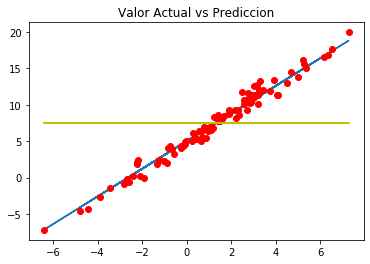

In [21]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "y")
plt.title("Valor Actual vs Prediccion")


In [15]:
data["SSR"]=(data["y_prediccion"]-np.mean(y_act))**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-np.mean(y_act))**2

In [16]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,1.824888,8.088158,8.467286,1.393338,0.143738,0.642033
1,2.587756,10.398467,9.916737,6.916098,0.232064,9.681919
2,1.189378,8.711310,7.259818,0.000733,2.106827,2.028974
3,5.023783,15.046272,14.545187,52.682895,0.251085,60.208019
4,0.683970,6.288353,6.299543,0.974852,0.000125,0.997074


In [17]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [18]:
SSR

2158.8839418572084

In [19]:
SSD

40.830909697516184

In [20]:
SST

2134.7681286324955

In [21]:
SSR + SSD

2199.7148515547246

In [22]:
R2 = SSR/SST

In [24]:
R2

1.0112966897440805

(array([ 3.,  6., 12., 18., 20., 19., 11.,  7.,  1.,  3.]),
 array([-1.47353945, -1.15487153, -0.83620362, -0.5175357 , -0.19886779,
         0.11980012,  0.43846804,  0.75713595,  1.07580386,  1.39447178,
         1.71313969]),
 <a list of 10 Patch objects>)

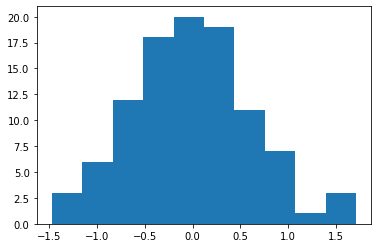

In [25]:
plt.hist(data["y_prediccion"]-data["y_actual"])

### Obteniendo la recta de regresion 
* formula y = a + b * x

* b = suma((xi - x_m) * (y_i - y_m)) / suma((xi - x_m)^2)

* a = y_m - b * x_m

In [42]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.1940136603865132, 7.286889090885005)

In [43]:
data["beta_n"] = (data["x"]-x_mean) *(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [44]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [45]:
alpha = y_mean - beta * x_mean

In [47]:
beta, alpha

(1.8714496157715022, 5.05235268492874)

El modelo lineal obtenido por regresion es y = (8.700645116238157 + 1.8714496157715022 * x)

In [48]:
data["y_model"] = alpha + beta * data["x"]

In [49]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,1.824888,8.088158,8.467286,1.393338,0.143738,0.642033,0.505500,0.398002,8.467538
1,2.587756,10.398467,9.916737,6.916098,0.232064,9.681919,4.336739,1.942518,9.895208
2,1.189378,8.711310,7.259818,0.000733,2.106827,2.028974,-0.006603,0.000021,7.278214
3,5.023783,15.046272,14.545187,52.682895,0.251085,60.208019,29.716645,14.667132,14.454109
4,0.683970,6.288353,6.299543,0.974852,0.000125,0.997074,0.509297,0.260144,6.332368


In [50]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [51]:
SSR, SSD, SST

(2094.458033502489, 40.31009513000818, 2134.7681286324955)

In [52]:
R2 = SSR /SST
R2

0.9811173426334462

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

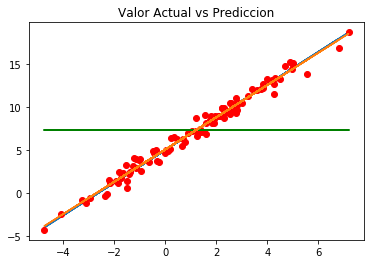

In [53]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) +1)]
%matplotlib inline
plt.plot(data["x"], data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Prediccion")

## El p valor
###### El modelo presenta una relacion lineal entre x e y 
###### Ye = alpha + beta * x 

## El estadistico F
##### Ye = alpha + suma Betai xi 

###### F = (SSR / k) / (SSD / n - k - 1)     p = P( F > F k, n - k -1)

### SST = suma( yi - y_mean)^2
### SSR = suma(y(xi) - y_mean)^2
### SSD = suma(yi - y(xi))^2

## El error estandar residual
###### Regresion lineal simple
##### RSE = V (suma(yi - y (xi))^2) / n -2  =  V  SSD / n - 2
###### Regresion lineal multiple
##### RSE = V SSD / (n - k - 1) 


In [55]:
RSE =  np.sqrt(SSD / (len(data)-2))
RSE

0.6413481903978634

In [56]:
np.mean(data["y_actual"])

7.286889090885005

In [57]:
RSE /np.mean(data["y_actual"])

0.0880139909361473